In [1]:
import numpy as np
from numpy import ma
import math
import scipy
import os
from IPython.display import Image
from tqdm import tqdm

from netCDF4 import Dataset

from cartopy import config
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.util import add_cyclic_point

import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.cm import get_cmap
from matplotlib import ticker

# from matplotlib.mlab import bivariate_normal

NA = 6.022e+23

In [2]:
# 0.5x0.625
FILEDIR1 = '/n/home12/hongwei/HONGWEI/GC_run_13.0/gc_05x0625_aerosol_compare_Eulerian'
NcFile1   = Dataset(FILEDIR1+'/OutputDir/GEOSChem.SpeciesConc.20120101_0000z.nc4','r',format='NETCDF4_CLASSIC')

lat1             = NcFile1.variables['lat'][:]
lon1             = NcFile1.variables['lon'][:]
EU1              = NcFile1.variables['SpeciesConc_PASV_EU']

GC_AREA1 = NcFile1.variables['AREA'][:,:]


# 1*1.25
FILEDIR2 = '/n/home12/hongwei/HONGWEI/GC_run_13.0/gc_1x125_aerosol_compare_Eulerian'
NcFile2   = Dataset(FILEDIR2+'/OutputDir/GEOSChem.SpeciesConc.20120101_0000z.nc4','r',format='NETCDF4_CLASSIC')

lat2             = NcFile2.variables['lat'][:]
lon2             = NcFile2.variables['lon'][:]
EU2              = NcFile2.variables['SpeciesConc_PASV_EU']

GC_AREA2 = NcFile2.variables['AREA'][:,:];


# 2*2.5
FILEDIR3 = '/n/home12/hongwei/HONGWEI/GC_run_13.0/gc_2x25_aerosol_compare_Eulerian'
NcFile3   = Dataset(FILEDIR3+'/OutputDir/GEOSChem.SpeciesConc.20120101_0000z.nc4','r',format='NETCDF4_CLASSIC')

lat3             = NcFile3.variables['lat'][:]
lon3             = NcFile3.variables['lon'][:]
EU3              = NcFile3.variables['SpeciesConc_PASV_EU']

GC_AREA3 = NcFile3.variables['AREA'][:,:];


# 4*5
FILEDIR4 = '/n/home12/hongwei/HONGWEI/GC_run_13.0/gc_4x5_aerosol_compare_Eulerian'
NcFile4   = Dataset(FILEDIR4+'/OutputDir/GEOSChem.SpeciesConc.20120101_0000z.nc4','r',format='NETCDF4_CLASSIC')

lat4             = NcFile4.variables['lat'][:]
lon4             = NcFile4.variables['lon'][:]
EU4              = NcFile4.variables['SpeciesConc_PASV_EU']

GC_AREA4 = NcFile4.variables['AREA'][:,:];


# lagrange: 2*2.5
FILEDIR0 = '/n/home12/hongwei/HONGWEI/GC_run_13.0/gc_2x25_aerosol_compare_lagrange'
NcFile0   = Dataset(FILEDIR0+'/OutputDir/GEOSChem.SpeciesConc.20120101_0000z.nc4','r',format='NETCDF4_CLASSIC')

lat0             = NcFile0.variables['lat'][:]
lon0             = NcFile0.variables['lon'][:]
LA0              = NcFile0.variables['SpeciesConc_PASV_LA'][:,:,:,:]
LA0_3            = NcFile0.variables['SpeciesConc_PASV_LA3'][:,:,:,:]

LA0 = LA0 + LA0_3

GC_AREA0 = NcFile0.variables['AREA'][:,:];

EU1

<class 'netCDF4._netCDF4.Variable'>
float32 SpeciesConc_PASV_EU(time, lev, lat, lon)
    long_name: Dry mixing ratio of species PASV_EU
    units: mol mol-1 dry
    averaging_method: instantaneous
unlimited dimensions: time
current shape = (31, 72, 361, 576)
filling off

In [3]:
del NcFile0, NcFile1, NcFile2, NcFile3, NcFile4

In [4]:
#------------------------------------------------
# total air mass in each grid  ------------------
#------------------------------------------------

# 0.5x0.625
AD_file1 = open(FILEDIR1+'/State_Met_AD.txt','r')

GC_AD1 = EU1[0,:,:,:]*0.0

Nx1 = len(EU1[0,0,0,:])
Ny1 = len(EU1[0,0,:,0])
Nz1 = len(EU1[0,:,0,0])
Nt1 = len(EU1[:,0,0,0])

for ix in range(Nx1):
    for iy in range(Ny1):
        for iz in range(Nz1):
            line = AD_file1.readline()
            GC_AD1[iz,iy,ix] = float(line)
            

# 1.0x1.25
AD_file2 = open(FILEDIR2+'/State_Met_AD.txt','r')

GC_AD2 = EU2[0,:,:,:]*0.0

Nx2 = len(EU2[0,0,0,:])
Ny2 = len(EU2[0,0,:,0])
Nz2 = len(EU2[0,:,0,0])
Nt2 = len(EU2[:,0,0,0])

for ix in range(Nx2):
    for iy in range(Ny2):
        for iz in range(Nz2):
            line = AD_file2.readline()
            GC_AD2[iz,iy,ix] = float(line)
            

# Eulerian: 2x2.5         
AD_file3 = open(FILEDIR3+'/State_Met_AD.txt','r')

GC_AD3 = EU3[0,:,:,:]*0.0

Nx3 = len(EU3[0,0,0,:])
Ny3 = len(EU3[0,0,:,0])
Nz3 = len(EU3[0,:,0,0])
Nt3 = len(EU3[:,0,0,0])

for ix in range(Nx3):
    for iy in range(Ny3):
        for iz in range(Nz3):
            line = AD_file3.readline()
            GC_AD3[iz,iy,ix] = float(line)
            

# 4x5          
AD_file4 = open(FILEDIR4+'/State_Met_AD.txt','r')

GC_AD4 = EU4[0,:,:,:]*0.0

Nx4 = len(EU4[0,0,0,:])
Ny4 = len(EU4[0,0,:,0])
Nz4 = len(EU4[0,:,0,0])
Nt4 = len(EU4[:,0,0,0])

for ix in range(Nx4):
    for iy in range(Ny4):
        for iz in range(Nz4):
            line = AD_file4.readline()
            GC_AD4[iz,iy,ix] = float(line)
            
            

# Lagrange: 2x2.5          
AD_file0 = open(FILEDIR0+'/State_Met_AD.txt','r')

GC_AD0 = LA0[0,:,:,:]*0.0

Nx0 = len(LA0[0,0,0,:])
Ny0 = len(LA0[0,0,:,0])
Nz0 = len(LA0[0,:,0,0])
Nt0 = len(LA0[:,0,0,0])

for ix in range(Nx0):
    for iy in range(Ny0):
        for iz in range(Nz0):
            line = AD_file0.readline()
            GC_AD0[iz,iy,ix] = float(line)

In [5]:
del AD_file0, AD_file1, AD_file2, AD_file3, AD_file4


In [6]:
### change unit, do average 

# 0.5x0.625
EU1_molec = EU1[:,:,:,:]*0.0
for i in range(Nt1):
    EU1_molec[i,:,:,:] = EU1[i,:,:,:]*(GC_AD1[:,:,:]*1000.0/28.97)*NA # [mol/mol] to [molec]   

EU1_Zsum = np.sum(EU1_molec[:,:,:,:], axis=1)
for i in range(Nt1):
    EU1_Zsum[i,:,:] = EU1_Zsum[i,:,:]/GC_AREA1[:,:]/1e4 # [molec/cm2]

EU1_Zsum_Xmean = np.mean(EU1_Zsum[:,:,:], axis=2)

print( np.sum(EU1_molec[Nt1-1,:,:,:]) )
del EU1


# 1.0x1.25 
EU2_molec = EU2[:,:,:,:]*0.0
for i in range(Nt2):
    EU2_molec[i,:,:,:] = EU2[i,:,:,:]*(GC_AD2[:,:,:]*1000.0/28.97)*NA # [mol/mol] to [molec]
    
EU2_Zsum = np.sum(EU2_molec[:,:,:,:], axis=1)
for i in range(Nt2):
    EU2_Zsum[i,:,:] = EU2_Zsum[i,:,:]/GC_AREA2[:,:]/1e4 # [molec/cm2]

EU2_Zsum_Xmean = np.mean(EU2_Zsum[:,:,:], axis=2)

print( np.sum(EU2_molec[Nt2-1,:,:,:]) )
del EU2


# 2.0x2.5
EU3_molec = EU3[:,:,:,:]*0.0
for i in range(Nt3):
    EU3_molec[i,:,:,:] = EU3[i,:,:,:]*(GC_AD3[:,:,:]*1000.0/28.97)*NA # [mol/mol] to [molec]
    
EU3_Zsum = np.sum(EU3_molec[:,:,:,:], axis=1)
for i in range(Nt3):
    EU3_Zsum[i,:,:] = EU3_Zsum[i,:,:]/GC_AREA3[:,:]/1e4 # [molec/cm2]
     
EU3_Zsum_Xmean = np.mean(EU3_Zsum[:,:,:], axis=2)

print( np.sum(EU3_molec[Nt3-1,:,:,:]) )
del EU3


# 4x5
EU4_molec = EU4[:,:,:,:]*0.0
for i in range(Nt4):
    EU4_molec[i,:,:,:] = EU4[i,:,:,:]*(GC_AD4[:,:,:]*1000.0/28.97)*NA # [mol/mol] to [molec]
    
EU4_Zsum = np.sum(EU4_molec[:,:,:,:], axis=1)
for i in range(Nt4):
    EU4_Zsum[i,:,:] = EU4_Zsum[i,:,:]/GC_AREA4[:,:]/1e4 # [molec/cm2]

EU4_Zsum_Xmean = np.mean(EU4_Zsum[:,:,:], axis=2)

print( np.sum(EU4_molec[Nt4-1,:,:,:]) )
del EU4


# lagrange: 2.0x2.5
LA0_molec = LA0[:,:,:,:]*0.0
for i in range(Nt0):
    LA0_molec[i,:,:,:] = LA0[i,:,:,:]*(GC_AD0[:,:,:]*1000.0/28.97)*NA

LA0_Zsum = np.sum(LA0_molec[:,:,:,:], axis=1)
for i in range(Nt0):
    LA0_Zsum[i,:,:]   = LA0_Zsum[i,:,:]/GC_AREA0[:,:]/1e4
    
LA0_Zsum_Xmean = np.mean(LA0_Zsum[:,:,:], axis=2)

print( np.sum(LA0_molec[Nt0-1,:,:,:]) )
del LA0

1.0416006e+33
1.0893754e+33
1.1113961e+33
1.0747897e+33
1.1056596e+33


Total mass [molec] in the end: 
GEOS-Chem         = 3.9154585431428825e+19
plume model 2*2.5 = 2.635726184360444e+18


31

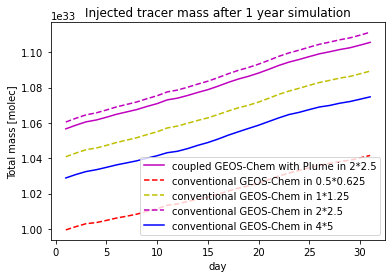

In [18]:


t = Nt1-1
print(f'Total mass [molec] in the end: ')
print(f'GEOS-Chem         = {np.sum(EU1_Zsum[t,:,:])}')
print(f'plume model 2*2.5 = {np.sum(LA0_Zsum[t,:,:])}')

LA0_mass = []
EU1_mass = []
EU2_mass = []
EU3_mass = []
EU4_mass = []

days = []

for i in range(Nt1):
    days.append(i+1);
    LA0_mass.append(np.sum(LA0_molec[i,:,:,:]))
    EU1_mass.append(np.sum(EU1_molec[i,:,:,:]))
    EU2_mass.append(np.sum(EU2_molec[i,:,:,:]))
    EU3_mass.append(np.sum(EU3_molec[i,:,:,:]))
    EU4_mass.append(np.sum(EU4_molec[i,:,:,:]))
    
plt.plot(days, LA0_mass, 'm', label='coupled GEOS-Chem with Plume in 2*2.5');

plt.plot(days, EU1_mass, 'r--', label='conventional GEOS-Chem in 0.5*0.625');
plt.plot(days, EU2_mass, 'y--', label='conventional GEOS-Chem in 1*1.25');
plt.plot(days, EU3_mass, 'm--', label='conventional GEOS-Chem in 2*2.5');
plt.plot(days, EU4_mass, 'b', label='conventional GEOS-Chem in 4*5');

plt.title('Injected tracer mass after 1 year simulation');
plt.xlabel('day');
plt.ylabel('Total mass [molec]');
plt.legend();

days[-1]

In [14]:
# plot  -----------------------------------------
#------------------------------------------------

# time step for ploting is 24 hours (once every day)
print(Nt1)

X_max = np.max(LA0_Zsum_Xmean[:,:],axis=(0,1)) # 16.5e+11;

i=0
for i in tqdm(np.arange(0,Nt1,1)):
    fig = plt.figure(figsize=(16,8));
#     gs = fig.add_gridspec(15, 8)
    plt.suptitle('Day: '+str(i+1), fontsize=16);
    
    
    
    # (1) for Lagrange ============================================================
    projection=ccrs.PlateCarree()
    ax1 = plt.subplot(2, 2, 1, projection=ccrs.PlateCarree());
    ax1.set_global()
    
    ax1.gridlines(x_inline=True)    
    ax1.set_xticks(np.linspace(-180, 180, 7), crs=projection)
    ax1.set_yticks(np.linspace(-90, 90, 7), crs=projection)
    lon_formatter = LongitudeFormatter(zero_direction_label=True)
    lat_formatter = LatitudeFormatter()
    ax1.xaxis.set_major_formatter(lon_formatter)
    ax1.yaxis.set_major_formatter(lat_formatter)
    

#     z = ma.masked_where(LA_Zsum[i,:,:] <= 1e-10, LA_Zsum[i,:,:])

    levels = [0.01e12, 0.05e12, 0.1e12, 0.5e12, 1e12, 5e12, 10e12]
    levels = np.array(levels)*10
    norm = colors.BoundaryNorm(boundaries=levels, ncolors=256)
    
    data = EU1_Zsum[i,:,:]
    cyclic_data = add_cyclic_point(data)
    data, lon1_cyclic = add_cyclic_point(data, coord=lon1)
    
    ax1_contours = ax1.contourf(lon1_cyclic, lat1, data, levels=levels, norm=norm,\
                                transform=ccrs.PlateCarree(), cmap=get_cmap("Reds"), extend="max");
    
    cb1 = plt.colorbar(ax1_contours, ax=ax1)
    cb1.ax.tick_params(labelsize=11)
    cb1.set_label('[molec/cm2]')
    
    ax1.coastlines();
    ax1.set_title('Lagrangian (2*2.5)', fontsize=11);


    
    # (2) for Lagrange Distribution: ==============================================
    ax2 = plt.subplot(2,2,2);
    
    ax2.plot(LA0_Zsum_Xmean[i,:], lat0, 'r-', label='Lagrange: 2*2.5');
    
    ax2.plot(EU1_Zsum_Xmean[i,:], lat1, color='b', linestyle='-', alpha=0.7, label='Eulerian: 0.5*0.625');
    ax2.plot(EU2_Zsum_Xmean[i,:], lat2, color='gray', linestyle='--',  alpha=0.7, label='Eulerian: 1*1.25');
    ax2.plot(EU3_Zsum_Xmean[i,:], lat3, color='gray', linestyle='-', alpha=0.7, label='Eulerian: 2*2.5');
    ax2.plot(EU4_Zsum_Xmean[i,:], lat4, color='gray', linestyle='--',  alpha=0.7, label='Eulerian: 4*5');
    
    ax2.set_xlim(0,X_max);
    ax2.set_ylim(-90,90);
    ax2.set_ylabel('Latitude (deg)');
    ax2.tick_params(axis='x', labelsize=11)  # to Set Matplotlib Tick Labels Font Size
    ax2.tick_params(axis='y', labelsize=11)
    ax2.legend();
    ax2.set_title('Lagrangian', fontsize=11);
    
    
    
     # (3) for EU ==================================================================
    ax3 = plt.subplot(2, 2, 3, projection=ccrs.PlateCarree());
    ax3.set_global()
    
    ax3.gridlines(x_inline=True)    
    ax3.set_xticks(np.linspace(-180, 180, 7), crs=projection)
    ax3.set_yticks(np.linspace(-90, 90, 7), crs=projection)
    lon_formatter = LongitudeFormatter(zero_direction_label=True)
    lat_formatter = LatitudeFormatter()
    ax3.xaxis.set_major_formatter(lon_formatter)
    ax3.yaxis.set_major_formatter(lat_formatter)
    
#     z = ma.masked_where(EU_Zsum[i,:,:] <= 1e-5, EU_Zsum[i,:,:])
    data = EU2_Zsum[i,:,:]
    cyclic_data = add_cyclic_point(data)
    data, lon2_cyclic = add_cyclic_point(data, coord=lon2)
    
    ax3_contours = ax3.contourf(lon2_cyclic, lat2, data, levels=levels, norm=norm,\
                                transform=ccrs.PlateCarree(), cmap=get_cmap("Reds"), extend="max");


    cb3 = plt.colorbar(ax3_contours, ax=ax3)
    cb3.ax.tick_params(labelsize=11)
    cb3.set_label('[molec/cm2]')
    
    ax3.coastlines();
    ax3.set_title('Eulerian (2*2.5)', fontsize=11);
    
    
    
    # (4) for GOES distribution ===================================================
    
    ax4 = plt.subplot(2,2,4);
    
    ax4.plot(EU1_Zsum_Xmean[i,:], lat1, 'r--', label='Eulerian: 0.5*0.625');
    ax4.plot(EU2_Zsum_Xmean[i,:], lat2, 'y--', label='Eulerian: 1*1.25');
    ax4.plot(EU3_Zsum_Xmean[i,:], lat3, 'm--', label='Eulerian: 2*2.5');
    ax4.plot(EU4_Zsum_Xmean[i,:], lat4, 'b--', label='Eulerian: 4*5');
    
    ax4.plot(LA0_Zsum_Xmean[i,:], lat0, color='gray', linestyle='-', alpha=0.7, label='Lagrangian: 2*2.5');
    
    
    ax4.set_xlim(0,X_max);
    ax4.set_ylim(-90,90);
    ax4.set_xlabel('Tracer Concentration [molec/cm2]');
    ax4.set_ylabel('Latitude (deg)');
    ax4.tick_params(axis='x', labelsize=11)  # to Set Matplotlib Tick Labels Font Size
    ax4.tick_params(axis='y', labelsize=11)
    ax4.legend()
    ax4.set_title('Eulerian', fontsize=11);
    
    
    plt.tight_layout()
    plt.savefig(str(i+1)+'_xy2.png', transparent=False, facecolor='w', edgecolor='w');
    plt.close();
    plt.clf();
    plt.cla();
        
plt.close();

  0%|          | 0/31 [00:00<?, ?it/s]

31


100%|██████████| 31/31 [00:37<00:00,  1.20s/it]


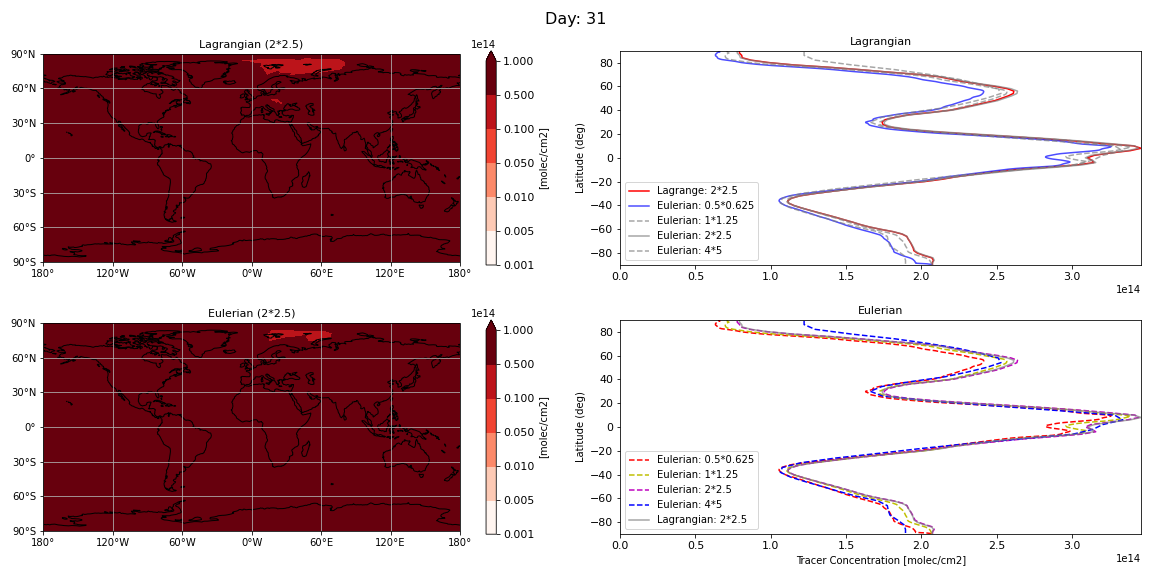

In [15]:
Image(filename=f'{Nt1}_xy2.png') 

In [16]:
os.system("./png2gif2.sh")

0

In [11]:
# calculate the average and std for the curves at last time step

time = Nt1-1

# LA1_Zsum_Xmean[time,:]
# LA2_Zsum_Xmean[time,:]

# EU1_Zsum_Xmean[time,:]
# EU2_Zsum_Xmean[time,:]

LA1_mean = np.mean(LA1_Zsum_Xmean[time,:])
LA1_std = np.std(LA1_Zsum_Xmean[time,:])

LA2_mean = np.mean(LA2_Zsum_Xmean[time,:])
LA2_std = np.std(LA2_Zsum_Xmean[time,:])

EU1_mean = np.mean(EU1_Zsum_Xmean[time,:])
EU1_std = np.std(EU1_Zsum_Xmean[time,:])

EU2_mean = np.mean(EU2_Zsum_Xmean[time,:])
EU2_std = np.std(EU2_Zsum_Xmean[time,:])

NameError: name 'LA1_Zsum_Xmean' is not defined

In [11]:
LA1_mean, LA1_std

(14465963725430.154, 16659546476534.467)

In [12]:
LA2_mean, LA2_std

(14301798290140.133, 16358390550016.844)

In [13]:
EU1_mean, EU1_std

(14497429813495.56, 16444030170871.246)

In [14]:
EU2_mean, EU2_std

(14371228429445.564, 16084378371554.979)